<a href="https://colab.research.google.com/github/ViCesar18/teste-colab/blob/master/4_Classes_ExperimentosCarambolaImagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Próximos Passos

* Reduzir a quantidade de camadas (pois nossa análise é basicamente de cor)

* Reduzir a quantidade de neurônios

* Reduzir o Learning Rate

* Fazer os testes com 4 classes (softmax)

* Tentar bater a acurácio do modelo baseline (86%)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import random
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.preprocessing.image import load_img, save_img

ModuleNotFoundError: ignored

In [ ]:
path = '/content/drive/MyDrive/Carambola'
images_path = os.path.join(path, 'Imagens/Originais')

# Abrindo as Imagens

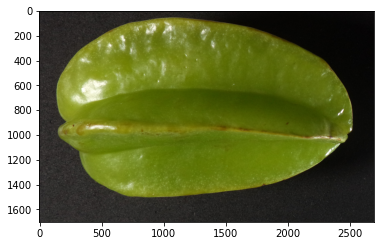

In [ ]:
img = mpimg.imread(os.path.join(images_path, '1 (1).JPG'))
plt.imshow(img)

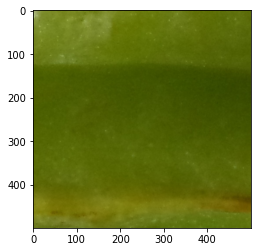

In [ ]:
cropped_image = img[500:1000, 1000:1500]

plt.imshow(cropped_image)

In [ ]:
images_csv[images_csv.duplicated('Name_file')]

,Name_file,Classe
307,1 (309).JPG,D
308,1 (310).JPG,D
309,1 (311).JPG,D
310,1 (312).JPG,D
311,1 (313).JPG,D
...,...,...
376,1 (377).JPG,D
377,1 (378).JPG,D
378,1 (379).JPG,D
379,1 (380).JPG,D


In [ ]:
# Planilha que mostra a qual classe pertence cada amostra

images_csv = pd.read_excel(os.path.join(path, 'datasetCarambolaImagem.xlsx'))
images_csv = images_csv[['Name_file', 'Classe']]
images_csv

,Name_file,Classe
0,1 (74).JPG,B
1,1 (75).JPG,B
2,1 (77).JPG,B
3,1 (78).JPG,B
4,1 (79).JPG,B
...,...,...
881,2 (357).JPG,C
882,2 (358).JPG,C
883,2 (359).JPG,C
884,2 (360).JPG,C


In [ ]:
images_csv = images_csv.drop_duplicates(subset=['Name_file'])

In [ ]:
images_csv[images_csv['Classe'] == 'D']

,Name_file,Classe
137,1 (211).JPG,D
138,1 (212).JPG,D
139,1 (213).JPG,D
140,1 (214).JPG,D
141,1 (215).JPG,D
...,...,...
465,1 (466).JPG,D
466,1 (467).JPG,D
467,1 (468).JPG,D
468,1 (469).JPG,D


In [ ]:
images_csv[images_csv['Name_file'] == '1 (309).JPG']['Classe'].to_numpy()[0]

'D'

In [ ]:
# Cria os diretórios no formato do Transformer

dataset_home = '/ExperimentosDL/images-transformer/'
subdirs = ['train/', 'val/']
for subdir in subdirs:
	labeldirs = ['1/', '2/', '3/', '4/']
	for labldir in labeldirs:
		newdir = path + dataset_home + subdir + labldir
		os.makedirs(newdir, exist_ok=True)

In [ ]:
# Salva nos diretórios criados acima

random.seed(18)
test_size = 0.20

for file in os.listdir(images_path):
  img = mpimg.imread(os.path.join(images_path, file))
  resized_img = tf.image.resize(img, (224, 224))

  dist_dir = 'train/' if random.random() > test_size else 'val/'

  if images_csv[images_csv['Name_file'] == file]['Classe'].empty:
    continue

  sample_class = images_csv[images_csv['Name_file'] == file]['Classe'].to_numpy()[0]

  if sample_class == 'A':
    dist_class = '1/'
  elif sample_class == 'B':
    dist_class = '2/'
  elif sample_class == 'C':
    dist_class = '3/'
  else:
    dist_class = '4/'

  save_img(path + os.path.join(path, dataset_home, dist_dir, dist_class, file), resized_img)

In [ ]:
# Cria os diretórios no formato do ImageDataGenerator

dataset_home = '/ExperimentosDL/images-4-classes/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	labeldirs = ['1/', '2/', '3/', '4/']
	for labldir in labeldirs:
		newdir = path + dataset_home + subdir + labldir
		os.makedirs(newdir, exist_ok=True)

In [ ]:
# Corta as imagens e salva nos diretórios criados acima

random.seed(18)
test_size = 0.15

for file in os.listdir(images_path):
  img = mpimg.imread(os.path.join(images_path, file))
  cropped_image = img[500:1000, 1000:1500]

  dist_dir = 'train/' if random.random() > test_size else 'test/'

  if images_csv[images_csv['Name_file'] == file]['Classe'].empty:
    continue

  sample_class = images_csv[images_csv['Name_file'] == file]['Classe'].to_numpy()[0]

  if sample_class == 'A':
    dist_class = '1/'
  elif sample_class == 'B':
    dist_class = '2/'
  elif sample_class == 'C':
    dist_class = '3/'
  else:
    dist_class = '4/'

  save_img(path + os.path.join(path, dataset_home, dist_dir, dist_class, file), cropped_image)

# Data Generator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
train_it_200 = datagen.flow_from_directory(path + os.path.join(path, dataset_home, 'train'),
	class_mode='sparse', batch_size=64, target_size=(200, 200))

test_it_200 = datagen.flow_from_directory(path + os.path.join(path, dataset_home, 'test'),
	class_mode='sparse', batch_size=64, target_size=(200, 200))

Found 695 images belonging to 4 classes.
Found 117 images belonging to 4 classes.


In [ ]:
train_it_500 = datagen.flow_from_directory(path + os.path.join(path, dataset_home, 'train'),
	class_mode='sparse', batch_size=64, target_size=(500, 500))

test_it_500 = datagen.flow_from_directory(path + os.path.join(path, dataset_home, 'test'),
	class_mode='sparse', batch_size=64, target_size=(500, 500))

Found 695 images belonging to 4 classes.
Found 117 images belonging to 4 classes.


In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
  # plot loss
  plt.subplot(211)
  plt.title('Cross Entropy Loss')
  plt.plot(history.history['loss'], color='blue', label='train')
  plt.plot(history.history['val_loss'], color='orange', label='test')
  plt.legend()

  plt.tight_layout(pad=2)

  # plot accuracy
  plt.subplot(212)
  plt.title('Classification Accuracy')
  plt.plot(history.history['accuracy'], color='blue', label='train')
  plt.plot(history.history['val_accuracy'], color='orange', label='test')
  plt.legend()
  
  plt.show()

# Testes Iniciais

### Conclusão

* As imagens com inputs de 200x200 são suficientes e possuem melhor performance
 * 86% de acurácia com SGD (lr = 0.0001)
 * 89% de acurácia com Adam (lr = 0.0001)

## Teste 1

*   input: 200x200
*   camada de convolução: 16 neurônios
*   camada densa: 64 neurônios
*   otimizador: SGD (lr = 0.0001)

In [ ]:
model_200_sgd = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform'),
  tf.keras.layers.Dense(4, activation='softmax')
])

opt = tf.keras.optimizers.SGD(learning_rate=0.0001)

model_200_sgd.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_200_sgd = model_200_sgd.fit(train_it_200, steps_per_epoch=len(train_it_200), validation_data=test_it_200, validation_steps=len(test_it_200), epochs=20, verbose=1)

Epoch 1/20
11/11 [==============================] - 121s 11s/step - loss: 1.3990 - accuracy: 0.4014 - val_loss: 1.2055 - val_accuracy: 0.5385
Epoch 2/20
11/11 [==============================] - 16s 1s/step - loss: 1.1776 - accuracy: 0.5367 - val_loss: 1.1568 - val_accuracy: 0.5385
Epoch 3/20
11/11 [==============================] - 16s 1s/step - loss: 1.0878 - accuracy: 0.5928 - val_loss: 1.0666 - val_accuracy: 0.5726
Epoch 4/20
11/11 [==============================] - 18s 2s/step - loss: 1.0244 - accuracy: 0.6302 - val_loss: 0.9747 - val_accuracy: 0.6752
Epoch 5/20
11/11 [==============================] - 17s 2s/step - loss: 0.9733 - accuracy: 0.6475 - val_loss: 0.9632 - val_accuracy: 0.6239
Epoch 6/20
11/11 [==============================] - 16s 1s/step - loss: 0.9433 - accuracy: 0.6676 - val_loss: 0.8999 - val_accuracy: 0.7521
Epoch 7/20
11/11 [==============================] - 17s 2s/step - loss: 0.9087 - accuracy: 0.6734 - val_loss: 0.8631 - val_accuracy: 0.7521
Epoch 8/20
11/11 [

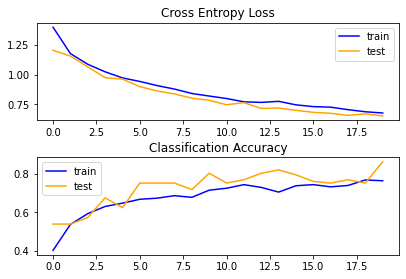

In [ ]:
summarize_diagnostics(history_200_sgd)

## Teste 2

*   input: 200x200
*   camada de convolução: 16 neurônios
*   camada densa: 64 neurônios
*   otimizador: Adam (lr = 0.0001)

In [ ]:
model_200_adam = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform'),
  tf.keras.layers.Dense(4, activation='softmax')
])

opt = tf.keras.optimizers.Adam(0.0001)

model_200_adam.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_200_adam = model_200_adam.fit(train_it_200, steps_per_epoch=len(train_it_200), validation_data=test_it_200, validation_steps=len(test_it_200), epochs=20, verbose=1)

Epoch 1/20
11/11 [==============================] - 17s 2s/step - loss: 2.1738 - accuracy: 0.3683 - val_loss: 1.2679 - val_accuracy: 0.7607
Epoch 2/20
11/11 [==============================] - 16s 1s/step - loss: 0.9295 - accuracy: 0.6489 - val_loss: 0.6770 - val_accuracy: 0.7009
Epoch 3/20
11/11 [==============================] - 16s 1s/step - loss: 0.6114 - accuracy: 0.7237 - val_loss: 0.5038 - val_accuracy: 0.8291
Epoch 4/20
11/11 [==============================] - 19s 2s/step - loss: 0.5206 - accuracy: 0.7856 - val_loss: 0.4392 - val_accuracy: 0.8291
Epoch 5/20
11/11 [==============================] - 16s 1s/step - loss: 0.4901 - accuracy: 0.7986 - val_loss: 0.4563 - val_accuracy: 0.8291
Epoch 6/20
11/11 [==============================] - 19s 2s/step - loss: 0.4778 - accuracy: 0.8058 - val_loss: 0.3904 - val_accuracy: 0.8376
Epoch 7/20
11/11 [==============================] - 16s 1s/step - loss: 0.4336 - accuracy: 0.8245 - val_loss: 0.3552 - val_accuracy: 0.8632
Epoch 8/20
11/11 [==

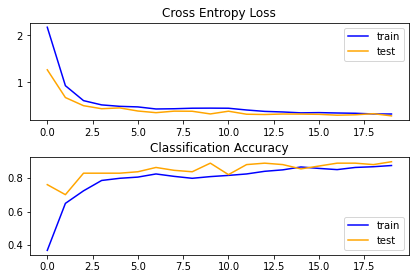

In [ ]:
summarize_diagnostics(history_200_adam)

## Teste 3

*   input: 500x500
*   camada de convolução: 16 neurônios
*   camada densa: 64 neurônios
*   otimizador: SGD (lr = 0.0001)

In [ ]:
model_500_sgd = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(500, 500, 3)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform'),
  tf.keras.layers.Dense(4, activation='softmax')
])

opt = tf.keras.optimizers.SGD(learning_rate=0.0001)

model_500_sgd.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_500_sgd = model_500_sgd.fit(train_it_500, steps_per_epoch=len(train_it_500), validation_data=test_it_500, validation_steps=len(test_it_500), epochs=20, verbose=1)

Epoch 1/20
11/11 [==============================] - 126s 11s/step - loss: 2.1959 - accuracy: 0.3180 - val_loss: 1.3544 - val_accuracy: 0.3590
Epoch 2/20
11/11 [==============================] - 90s 8s/step - loss: 1.3509 - accuracy: 0.4331 - val_loss: 1.3313 - val_accuracy: 0.6581
Epoch 3/20
11/11 [==============================] - 88s 8s/step - loss: 1.3298 - accuracy: 0.5050 - val_loss: 1.3160 - val_accuracy: 0.5043
Epoch 4/20
11/11 [==============================] - 85s 8s/step - loss: 1.3154 - accuracy: 0.5094 - val_loss: 1.2995 - val_accuracy: 0.5214
Epoch 5/20
11/11 [==============================] - 86s 8s/step - loss: 1.3006 - accuracy: 0.5036 - val_loss: 1.2828 - val_accuracy: 0.5214
Epoch 6/20
11/11 [==============================] - 93s 9s/step - loss: 1.2897 - accuracy: 0.5151 - val_loss: 1.2712 - val_accuracy: 0.5812
Epoch 7/20
11/11 [==============================] - 88s 8s/step - loss: 1.2761 - accuracy: 0.5122 - val_loss: 1.2494 - val_accuracy: 0.5214
Epoch 8/20
11/11 [

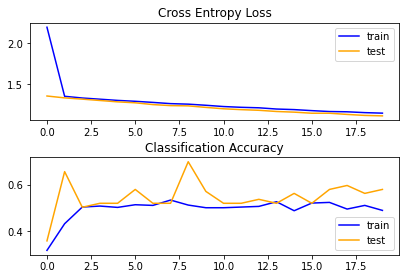

In [ ]:
summarize_diagnostics(history_500_sgd)

## Teste 4

*   input: 500x500
*   camada de convolução: 16 neurônios
*   camada densa: 64 neurônios
*   otimizador: Adam (lr = 0.0001)

In [ ]:
model_500_adam = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(500, 500, 3)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_uniform'),
  tf.keras.layers.Dense(4, activation='softmax')
])

opt = tf.keras.optimizers.Adam(0.0001)

model_500_adam.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_500_adam = model_500_adam.fit(train_it_500, steps_per_epoch=len(train_it_500), validation_data=test_it_500, validation_steps=len(test_it_500), epochs=20, verbose=1)

Epoch 1/20
11/11 [==============================] - 96s 9s/step - loss: 15.9525 - accuracy: 0.2921 - val_loss: 8.4395 - val_accuracy: 0.2479
Epoch 2/20
11/11 [==============================] - 90s 8s/step - loss: 7.2036 - accuracy: 0.3396 - val_loss: 3.4359 - val_accuracy: 0.5214
Epoch 3/20
11/11 [==============================] - 94s 9s/step - loss: 2.6056 - accuracy: 0.4029 - val_loss: 1.5558 - val_accuracy: 0.5214
Epoch 4/20
11/11 [==============================] - 88s 8s/step - loss: 1.4494 - accuracy: 0.4647 - val_loss: 1.0679 - val_accuracy: 0.5214
Epoch 5/20
11/11 [==============================] - 95s 9s/step - loss: 0.9561 - accuracy: 0.5353 - val_loss: 0.8165 - val_accuracy: 0.6239
Epoch 6/20
11/11 [==============================] - 91s 8s/step - loss: 0.8210 - accuracy: 0.5957 - val_loss: 0.8251 - val_accuracy: 0.5385
Epoch 7/20
11/11 [==============================] - 91s 8s/step - loss: 0.7657 - accuracy: 0.6144 - val_loss: 0.6745 - val_accuracy: 0.6923
Epoch 8/20
11/11 [=

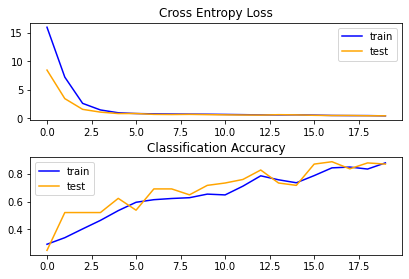

In [ ]:
summarize_diagnostics(history_500_adam)

# Teste de redução de neurônios na camada densa

* Reduzir os neurônios na camada densa de 64 para 32 resultou em bastante queda nos resultados com o otimizador SGD, mas não teve impacto com o Adam:
*  63% de acurácia com SGD (lr = 0.0001)
*  88% de acurácia com Adam (lr = 0.0001)

## Teste 1

*   input: 200x200
*   camada de convolução: 16 neurônios
*   camada densa: 32 neurônios
*   otimizador: SGD (lr = 0.0001)

In [ ]:
model_200_sgd_32n = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu', kernel_initializer='he_uniform'),
  tf.keras.layers.Dense(4, activation='softmax')
])

opt = tf.keras.optimizers.SGD(learning_rate=0.0001)

model_200_sgd_32n.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_200_sgd_32n = model_200_sgd_32n.fit(train_it_200, steps_per_epoch=len(train_it_200), validation_data=test_it_200, validation_steps=len(test_it_200), epochs=20, verbose=1)

Epoch 1/20
11/11 [==============================] - 558s 51s/step - loss: 1.3806 - accuracy: 0.3151 - val_loss: 1.4147 - val_accuracy: 0.2906
Epoch 2/20
11/11 [==============================] - 15s 1s/step - loss: 1.3228 - accuracy: 0.3655 - val_loss: 1.3346 - val_accuracy: 0.2991
Epoch 3/20
11/11 [==============================] - 15s 1s/step - loss: 1.3337 - accuracy: 0.3108 - val_loss: 1.3379 - val_accuracy: 0.2564
Epoch 4/20
11/11 [==============================] - 15s 1s/step - loss: 1.3102 - accuracy: 0.3525 - val_loss: 1.2741 - val_accuracy: 0.5556
Epoch 5/20
11/11 [==============================] - 16s 1s/step - loss: 1.2869 - accuracy: 0.4129 - val_loss: 1.2847 - val_accuracy: 0.2735
Epoch 6/20
11/11 [==============================] - 15s 1s/step - loss: 1.2683 - accuracy: 0.4201 - val_loss: 1.3860 - val_accuracy: 0.2906
Epoch 7/20
11/11 [==============================] - 15s 1s/step - loss: 1.2624 - accuracy: 0.3928 - val_loss: 1.2412 - val_accuracy: 0.4103
Epoch 8/20
11/11 [

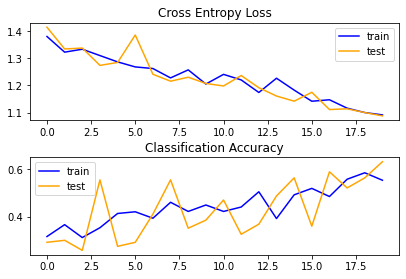

In [ ]:
summarize_diagnostics(history_200_sgd_32n)

## Teste 2

*   input: 200x200
*   camada de convolução: 16 neurônios
*   camada densa: 32 neurônios
*   otimizador: Adam (lr = 0.0001)

In [ ]:
model_200_adam_32n = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu', kernel_initializer='he_uniform'),
  tf.keras.layers.Dense(4, activation='softmax')
])

opt = tf.keras.optimizers.Adam(0.0001)

model_200_adam_32n.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_200_adam_32n = model_200_adam_32n.fit(train_it_200, steps_per_epoch=len(train_it_200), validation_data=test_it_200, validation_steps=len(test_it_200), epochs=20, verbose=1)

Epoch 1/20
11/11 [==============================] - 16s 1s/step - loss: 2.4962 - accuracy: 0.2791 - val_loss: 1.3640 - val_accuracy: 0.2735
Epoch 2/20
11/11 [==============================] - 15s 1s/step - loss: 1.1008 - accuracy: 0.4849 - val_loss: 0.9567 - val_accuracy: 0.6581
Epoch 3/20
11/11 [==============================] - 15s 1s/step - loss: 0.8984 - accuracy: 0.5683 - val_loss: 0.8627 - val_accuracy: 0.4701
Epoch 4/20
11/11 [==============================] - 16s 1s/step - loss: 0.8325 - accuracy: 0.6014 - val_loss: 0.7042 - val_accuracy: 0.5983
Epoch 5/20
11/11 [==============================] - 16s 1s/step - loss: 0.6988 - accuracy: 0.6763 - val_loss: 0.6210 - val_accuracy: 0.7009
Epoch 6/20
11/11 [==============================] - 15s 1s/step - loss: 0.6746 - accuracy: 0.6748 - val_loss: 0.5386 - val_accuracy: 0.8120
Epoch 7/20
11/11 [==============================] - 16s 1s/step - loss: 0.6254 - accuracy: 0.7180 - val_loss: 0.5435 - val_accuracy: 0.7094
Epoch 8/20
11/11 [==

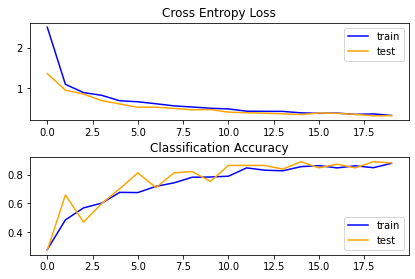

In [ ]:
summarize_diagnostics(history_200_adam_32n)

# Teste com mais épocas

### Conclusão

* O modelo com menos neurônios na camada densa e com o otimizador SGD precisou de mais épocas para alcançar os resultados próximos aos atingidos anteriormente (aprox. 30 épocas)

* Para o modelo com o otimizador Adam, treinar por mais épocas não teve resultados positivos já que ele atinge o overfitting após aproximadamente 15 épocas

## Teste 1

*   input: 200x200
*   camada de convolução: 16 neurônios
*   camada densa: 32 neurônios
*   otimizador: SGD (lr = 0.0001)
*   épocas: 50

In [ ]:
model_200_sgd_32n_50e = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu', kernel_initializer='he_uniform'),
  tf.keras.layers.Dense(4, activation='softmax')
])

opt = tf.keras.optimizers.SGD(learning_rate=0.0001)

model_200_sgd_32n_50e.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_200_sgd_32n_50e = model_200_sgd_32n_50e.fit(train_it_200, steps_per_epoch=len(train_it_200), validation_data=test_it_200, validation_steps=len(test_it_200), epochs=50, verbose=1)

Epoch 1/50
11/11 [==============================] - 20s 2s/step - loss: 1.3510 - accuracy: 0.3079 - val_loss: 1.3416 - val_accuracy: 0.2906
Epoch 2/50
11/11 [==============================] - 16s 1s/step - loss: 1.3204 - accuracy: 0.3165 - val_loss: 1.3109 - val_accuracy: 0.3162
Epoch 3/50
11/11 [==============================] - 17s 2s/step - loss: 1.2980 - accuracy: 0.3266 - val_loss: 1.2825 - val_accuracy: 0.3675
Epoch 4/50
11/11 [==============================] - 17s 2s/step - loss: 1.2721 - accuracy: 0.3640 - val_loss: 1.2610 - val_accuracy: 0.3590
Epoch 5/50
11/11 [==============================] - 16s 1s/step - loss: 1.2496 - accuracy: 0.4101 - val_loss: 1.2359 - val_accuracy: 0.4103
Epoch 6/50
11/11 [==============================] - 16s 1s/step - loss: 1.2280 - accuracy: 0.4460 - val_loss: 1.2146 - val_accuracy: 0.4017
Epoch 7/50
11/11 [==============================] - 16s 1s/step - loss: 1.2066 - accuracy: 0.4302 - val_loss: 1.1897 - val_accuracy: 0.6667
Epoch 8/50
11/11 [==

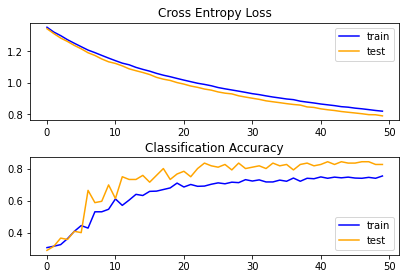

In [ ]:
summarize_diagnostics(history_200_sgd_32n_50e)

## Teste 2

*   input: 200x200
*   camada de convolução: 16 neurônios
*   camada densa: 32 neurônios
*   otimizador: Adam (lr = 0.0001)
*   épocas: 50

In [ ]:
model_200_adam_32n_50e = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu', kernel_initializer='he_uniform'),
  tf.keras.layers.Dense(4, activation='softmax')
])

opt = tf.keras.optimizers.Adam(0.0001)

model_200_adam_32n_50e.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_200_adam_32n_50e = model_200_adam_32n_50e.fit(train_it_200, steps_per_epoch=len(train_it_200), validation_data=test_it_200, validation_steps=len(test_it_200), epochs=50, verbose=1)

Epoch 1/50
11/11 [==============================] - 122s 11s/step - loss: 4.2428 - accuracy: 0.2719 - val_loss: 1.3863 - val_accuracy: 0.2051
Epoch 2/50
11/11 [==============================] - 16s 1s/step - loss: 1.3863 - accuracy: 0.2058 - val_loss: 1.3863 - val_accuracy: 0.2735
Epoch 3/50
11/11 [==============================] - 16s 1s/step - loss: 1.3863 - accuracy: 0.3079 - val_loss: 1.3863 - val_accuracy: 0.2735
Epoch 4/50
11/11 [==============================] - 16s 1s/step - loss: 1.3862 - accuracy: 0.3079 - val_loss: 1.3863 - val_accuracy: 0.2735
Epoch 5/50
11/11 [==============================] - 16s 1s/step - loss: 1.3862 - accuracy: 0.3079 - val_loss: 1.3863 - val_accuracy: 0.2735
Epoch 6/50
11/11 [==============================] - 18s 2s/step - loss: 1.3861 - accuracy: 0.3079 - val_loss: 1.3862 - val_accuracy: 0.2735
Epoch 7/50
11/11 [==============================] - 16s 1s/step - loss: 1.3860 - accuracy: 0.3079 - val_loss: 1.3862 - val_accuracy: 0.2735
Epoch 8/50
11/11 [

In [ ]:
summarize_diagnostics(history_200_adam_32n_50e)

NameError: ignored

# Dúvidas

* Porque alguns modelos variam tanto a acurácia, indo e voltando nos mesmos valores, mesmo com a taxa de erro caindo constantemente?

* Existe alguma 'heurística' na escolha dos otimizadores, ou é só no teste e comparação mesmo?

* Os modelos estão aprendendo muito rapidamente?

# Próximos Passos

- verificar o equilibrio (performance por classe)

- termo de regularização

- grad-CAM